In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("IMDb Movies India.csv",encoding='latin_1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.shape

(15509, 10)

In [7]:
df=df.dropna()

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
def sep(x):
    j=""
    for i in x:
        if i not in "()min,":
            j+=i
    return int(j)
df['Year']=df["Year"].apply(lambda x:sep(x))
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [10]:
df['Votes']=df['Votes'].apply(lambda x:sep(x))
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [11]:
df['Duration']=df['Duration'].apply(lambda x:sep(x))
df['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [12]:
year=df['Genre'].groupby(df['Year']).count()
l=[]
for i,j in year.items():
    l.append(i)

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'rate of movies released per year')

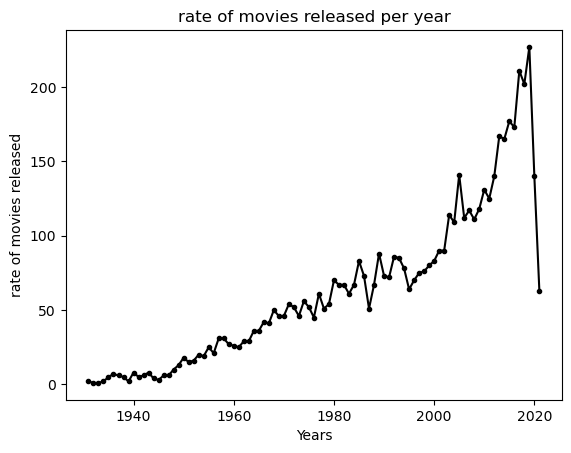

In [14]:
plt.plot(l,year.values,'.-k')
plt.xlabel("Years")
plt.ylabel('rate of movies released')
plt.title('rate of movies released per year')

In [15]:
genre=df['Rating'].groupby(df['Genre']).mean()
genres=sorted(genre)
l=[]
for i,j in genre.items():
    l.append(i)

(array([ 6.,  8., 14., 42., 96., 89., 79., 29.,  9.,  4.]),
 array([2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. , 8.7, 9.4]),
 <BarContainer object of 10 artists>)

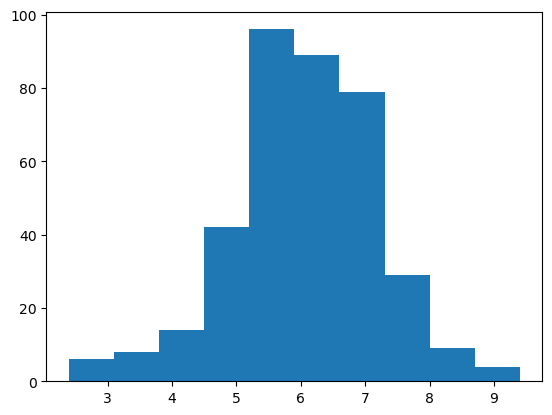

In [16]:
plt.hist(genres,label=l)

In [17]:
Dict=df['Name'].groupby(df['Director']).count()
Dict

Director
A. Bhimsingh      14
A. Jagannathan     3
A. Majid           1
A. Muthu           1
A. Salaam          4
                  ..
Zia Sarhadi        3
Ziaullah Khan      1
Zoya Akhtar        7
Zubair Khan        1
Zunaid Memon       1
Name: Name, Length: 2431, dtype: int64

In [18]:
Dict={k: v for k, v in sorted(Dict.items(), key=lambda item: item[1])}
l=[]
v=[]
for i,j in Dict.items():
    l.append(i)
    v.append(round(j,2))

In [19]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

Text(0.5, 1.0, 'most number of movie directed by directors')

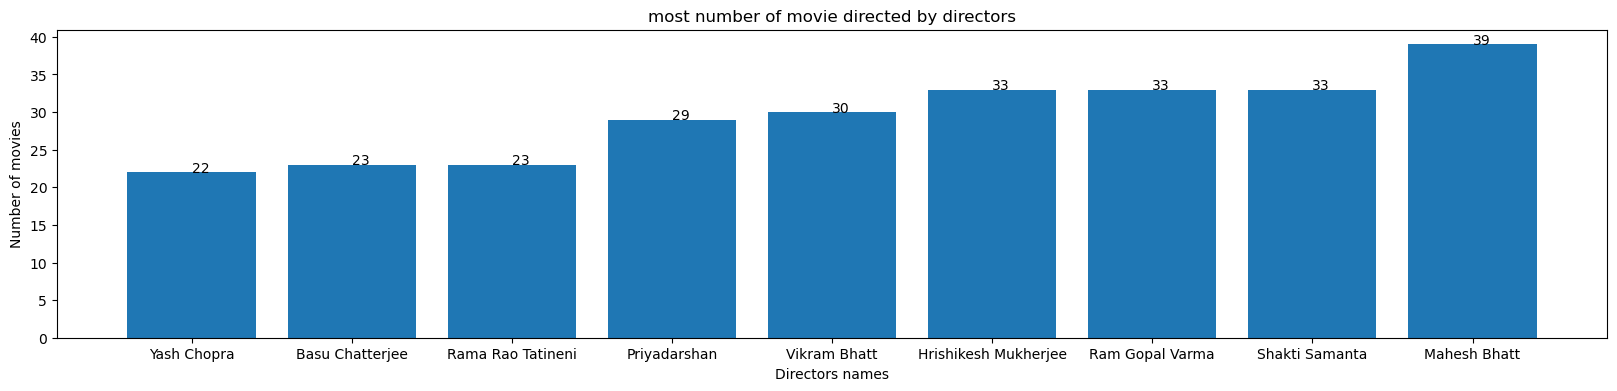

In [20]:
plt.figure(figsize=(20,4))
plt.bar(l[-10:-1],v[-10:-1])
addlabels(l[-10:-1],v[-10:-1])
plt.xlabel("Directors names")
plt.ylabel('Number of movies')
plt.title("most number of movie directed by directors")

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df['Director']=le.fit_transform(df['Director'])
df['Genre']=le.fit_transform(df['Genre'])

In [23]:
x=df.loc[:,['Director','Genre','Year','Votes','Duration']]
y=df['Rating']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test)

In [31]:
lr.coef_

array([ 2.63814229e-05,  1.32382432e-03, -1.71810308e-02,  1.86877239e-05,
       -3.85920695e-03])

In [32]:
lr.intercept_

40.403050931456335

In [35]:
lr.score(x_test,y_pred)

1.0